# Notebook 07: Comparaison Finale des Modèles avec MLflow



## 1. Imports et Configuration

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import du module utilitaire MLflow
from mlflow_utils import (
    init_mlflow, 
    EXPERIMENTS,
    get_all_runs,
    compare_models,
    get_best_model,
    load_best_model,
    generate_comparison_report,
    print_comparison_report
)

# Configuration des visualisations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Imports terminés avec succès!")

Imports terminés avec succès!


In [2]:
# Initialiser MLflow
mlflow.set_tracking_uri("file:./mlruns")

# Lister toutes les expériences disponibles
print("Expériences MLflow disponibles:")
print("=" * 50)
experiments = mlflow.search_experiments()
for exp in experiments:
    if exp.name != "Default":
        print(f"  - {exp.name} (ID: {exp.experiment_id})")

Expériences MLflow disponibles:
  - Heart_Disease_Hyperparameter_Tuning (ID: 262221383187447651)
  - Heart_Disease_Regression (ID: 971096631646366527)
  - Heart_Disease_Classification (ID: 487043277283511099)
  - Heart_Disease_Clustering (ID: 189608228128741953)
  - Heart_Disease_Feature_Engineering (ID: 444656991134449736)


## 2. Comparaison des Modèles de Classification

In [3]:
# Récupérer les runs de classification
CLASSIFICATION_EXPERIMENT = "Heart_Disease_04_Classification"

classification_runs = get_all_runs(experiment_name=CLASSIFICATION_EXPERIMENT)

if not classification_runs.empty:
    print(f"Nombre de modèles de classification: {len(classification_runs)}")
    
    # Comparer par accuracy
    classification_comparison = compare_models(CLASSIFICATION_EXPERIMENT, metric_name="accuracy")
    
    # Afficher le top 10
    print("\nTop 10 Modèles de Classification (par Accuracy):")
    display_cols = ['runName', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
    display_cols = [c for c in display_cols if c in classification_comparison.columns]
    print(classification_comparison[display_cols].head(10).to_string(index=False))
else:
    print("Aucun run de classification trouvé. Exécutez d'abord le notebook 04.")

Aucun run de classification trouvé. Exécutez d'abord le notebook 04.


In [4]:
# Visualisation des performances de classification
if not classification_runs.empty and 'metrics.accuracy' in classification_runs.columns:
    # Préparer les données
    plot_data = classification_runs[['tags.mlflow.runName', 'metrics.accuracy', 
                                      'metrics.precision', 'metrics.recall', 
                                      'metrics.f1_score']].copy()
    plot_data.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    plot_data = plot_data.dropna().sort_values('Accuracy', ascending=True)
    
    # Graphique des métriques
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Barplot Accuracy
    ax1 = axes[0]
    colors = plt.cm.RdYlGn(plot_data['Accuracy'].values)
    ax1.barh(plot_data['Model'], plot_data['Accuracy'], color=colors)
    ax1.set_xlabel('Accuracy')
    ax1.set_title('Accuracy par Modèle de Classification')
    ax1.set_xlim([0, 1])
    
    # Ajouter les valeurs
    for i, (model, acc) in enumerate(zip(plot_data['Model'], plot_data['Accuracy'])):
        ax1.text(acc + 0.01, i, f'{acc:.3f}', va='center')
    
    # Heatmap des métriques
    ax2 = axes[1]
    metrics_df = plot_data.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
    sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax2,
                vmin=0, vmax=1, cbar_kws={'label': 'Score'})
    ax2.set_title('Heatmap des Métriques de Classification')
    
    plt.tight_layout()
    plt.savefig('images/classification_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("\nGraphique sauvegardé: classification_comparison.png")

In [5]:
# Meilleur modèle de classification
if not classification_runs.empty:
    best_classifier = get_best_model(CLASSIFICATION_EXPERIMENT, metric_name="accuracy")
    
    if best_classifier:
        print("🏆 MEILLEUR MODÈLE DE CLASSIFICATION")
        print("=" * 50)
        print(f"Modèle: {best_classifier['run_name']}")
        print(f"Run ID: {best_classifier['run_id']}")
        print(f"Accuracy: {best_classifier['metric_value']:.4f}")
        
        # Charger le modèle
        # best_model = load_best_model(CLASSIFICATION_EXPERIMENT, metric_name="accuracy")

## 3. Comparaison des Modèles de Régression

In [6]:
# Récupérer les runs de régression
REGRESSION_EXPERIMENT = "Heart_Disease_05_Regression"

regression_runs = get_all_runs(experiment_name=REGRESSION_EXPERIMENT)

if not regression_runs.empty:
    print(f"Nombre de modèles de régression: {len(regression_runs)}")
    
    # Comparer par R²
    regression_comparison = compare_models(REGRESSION_EXPERIMENT, metric_name="r2")
    
    print("\nModèles de Régression (triés par R²):")
    display_cols = ['runName', 'r2', 'rmse', 'mae', 'mse']
    display_cols = [c for c in display_cols if c in regression_comparison.columns]
    print(regression_comparison[display_cols].to_string(index=False))
else:
    print("Aucun run de régression trouvé. Exécutez d'abord le notebook 05.")

Aucun run de régression trouvé. Exécutez d'abord le notebook 05.


In [7]:
# Visualisation des performances de régression
if not regression_runs.empty and 'metrics.r2' in regression_runs.columns:
    plot_data = regression_runs[['tags.mlflow.runName', 'metrics.r2', 
                                  'metrics.rmse', 'metrics.mae']].copy()
    plot_data.columns = ['Model', 'R²', 'RMSE', 'MAE']
    plot_data = plot_data.dropna().sort_values('R²', ascending=True)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # R² Score
    ax1 = axes[0]
    colors = plt.cm.RdYlGn(plot_data['R²'].values)
    ax1.barh(plot_data['Model'], plot_data['R²'], color=colors)
    ax1.set_xlabel('R² Score')
    ax1.set_title('R² par Modèle de Régression')
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    
    for i, (model, r2) in enumerate(zip(plot_data['Model'], plot_data['R²'])):
        ax1.text(r2 + 0.02, i, f'{r2:.3f}', va='center')
    
    # RMSE (plus petit = meilleur)
    ax2 = axes[1]
    plot_data_sorted = plot_data.sort_values('RMSE', ascending=False)
    colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(plot_data_sorted)))
    ax2.barh(plot_data_sorted['Model'], plot_data_sorted['RMSE'], color=colors)
    ax2.set_xlabel('RMSE (plus petit = meilleur)')
    ax2.set_title('RMSE par Modèle de Régression')
    
    plt.tight_layout()
    plt.savefig('images/regression_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("\nGraphique sauvegardé: regression_comparison.png")

## 4. Comparaison des Modèles de Clustering

In [8]:
# Récupérer les runs de clustering
CLUSTERING_EXPERIMENT = "Heart_Disease_03_Clustering"

clustering_runs = get_all_runs(experiment_name=CLUSTERING_EXPERIMENT)

if not clustering_runs.empty:
    print(f"Nombre de modèles de clustering: {len(clustering_runs)}")
    
    # Comparer par silhouette score
    clustering_comparison = compare_models(CLUSTERING_EXPERIMENT, metric_name="silhouette_score")
    
    print("\nModèles de Clustering (triés par Silhouette Score):")
    display_cols = ['runName', 'silhouette_score', 'davies_bouldin_score', 
                    'calinski_harabasz_score', 'n_clusters']
    display_cols = [c for c in display_cols if c in clustering_comparison.columns]
    print(clustering_comparison[display_cols].to_string(index=False))
else:
    print("Aucun run de clustering trouvé. Exécutez d'abord le notebook 03.")

Aucun run de clustering trouvé. Exécutez d'abord le notebook 03.


In [9]:
# Visualisation des performances de clustering
if not clustering_runs.empty and 'metrics.silhouette_score' in clustering_runs.columns:
    plot_data = clustering_runs[['tags.mlflow.runName', 'metrics.silhouette_score',
                                  'metrics.davies_bouldin_score']].copy()
    plot_data.columns = ['Model', 'Silhouette', 'Davies-Bouldin']
    plot_data = plot_data.dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Silhouette Score (plus grand = meilleur)
    ax1 = axes[0]
    plot_sorted = plot_data.sort_values('Silhouette', ascending=True)
    colors = plt.cm.RdYlGn(np.linspace(0, 1, len(plot_sorted)))
    ax1.barh(plot_sorted['Model'], plot_sorted['Silhouette'], color=colors)
    ax1.set_xlabel('Silhouette Score (plus grand = meilleur)')
    ax1.set_title('Silhouette Score par Algorithme')
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    
    # Davies-Bouldin Score (plus petit = meilleur)
    ax2 = axes[1]
    plot_sorted = plot_data.sort_values('Davies-Bouldin', ascending=False)
    colors = plt.cm.RdYlGn(np.linspace(0, 1, len(plot_sorted)))
    ax2.barh(plot_sorted['Model'], plot_sorted['Davies-Bouldin'], color=colors)
    ax2.set_xlabel('Davies-Bouldin Score (plus petit = meilleur)')
    ax2.set_title('Davies-Bouldin Score par Algorithme')
    
    plt.tight_layout()
    plt.savefig('images/clustering_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("\nGraphique sauvegardé: clustering_comparison.png")

## 5. Comparaison de l'Hyperparameter Tuning

In [10]:
# Récupérer les runs d'hyperparameter tuning
TUNING_EXPERIMENT = "Heart_Disease_06_Hyperparameter_Tuning"

tuning_runs = get_all_runs(experiment_name=TUNING_EXPERIMENT)

if not tuning_runs.empty:
    print(f"Nombre de runs de tuning: {len(tuning_runs)}")
    
    # Afficher les résultats
    tuning_comparison = compare_models(TUNING_EXPERIMENT, metric_name="best_cv_score")
    
    print("\nRésultats Hyperparameter Tuning:")
    display_cols = ['runName', 'best_cv_score', 'test_accuracy', 'improvement_pct']
    display_cols = [c for c in display_cols if c in tuning_comparison.columns]
    if display_cols:
        print(tuning_comparison[display_cols].to_string(index=False))
else:
    print("Aucun run de tuning trouvé. Exécutez d'abord le notebook 06.")

Aucun run de tuning trouvé. Exécutez d'abord le notebook 06.


## 6. Rapport Global de Comparaison

In [11]:
# Générer le rapport complet
print_comparison_report()

RAPPORT DE COMPARAISON - Heart Disease ML Project
Généré le: 2026-02-13T18:23:16.489476

Pour voir les détails dans MLflow UI, exécutez:
  mlflow ui --port 5000
Puis ouvrez: http://localhost:5000


In [12]:
# Créer un DataFrame récapitulatif
summary_data = []

# Classification
if not classification_runs.empty:
    best = get_best_model(CLASSIFICATION_EXPERIMENT, "accuracy")
    if best:
        summary_data.append({
            'Phase': 'Classification',
            'Meilleur Modèle': best['run_name'],
            'Métrique Principale': 'Accuracy',
            'Score': best['metric_value'],
            'Nb Modèles': len(classification_runs)
        })

# Régression
if not regression_runs.empty:
    best = get_best_model(REGRESSION_EXPERIMENT, "r2")
    if best:
        summary_data.append({
            'Phase': 'Regression',
            'Meilleur Modèle': best['run_name'],
            'Métrique Principale': 'R²',
            'Score': best['metric_value'],
            'Nb Modèles': len(regression_runs)
        })

# Clustering
if not clustering_runs.empty:
    best = get_best_model(CLUSTERING_EXPERIMENT, "silhouette_score")
    if best:
        summary_data.append({
            'Phase': 'Clustering',
            'Meilleur Modèle': best['run_name'],
            'Métrique Principale': 'Silhouette',
            'Score': best['metric_value'],
            'Nb Modèles': len(clustering_runs)
        })

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    print("\n" + "=" * 70)
    print("TABLEAU RÉCAPITULATIF - MEILLEURS MODÈLES PAR PHASE")
    print("=" * 70)
    print(summary_df.to_string(index=False))
    
    # Sauvegarder
    summary_df.to_csv('best_models_summary.csv', index=False)
    print("\nRécapitulatif sauvegardé: best_models_summary.csv")

## 7. Visualisation Globale

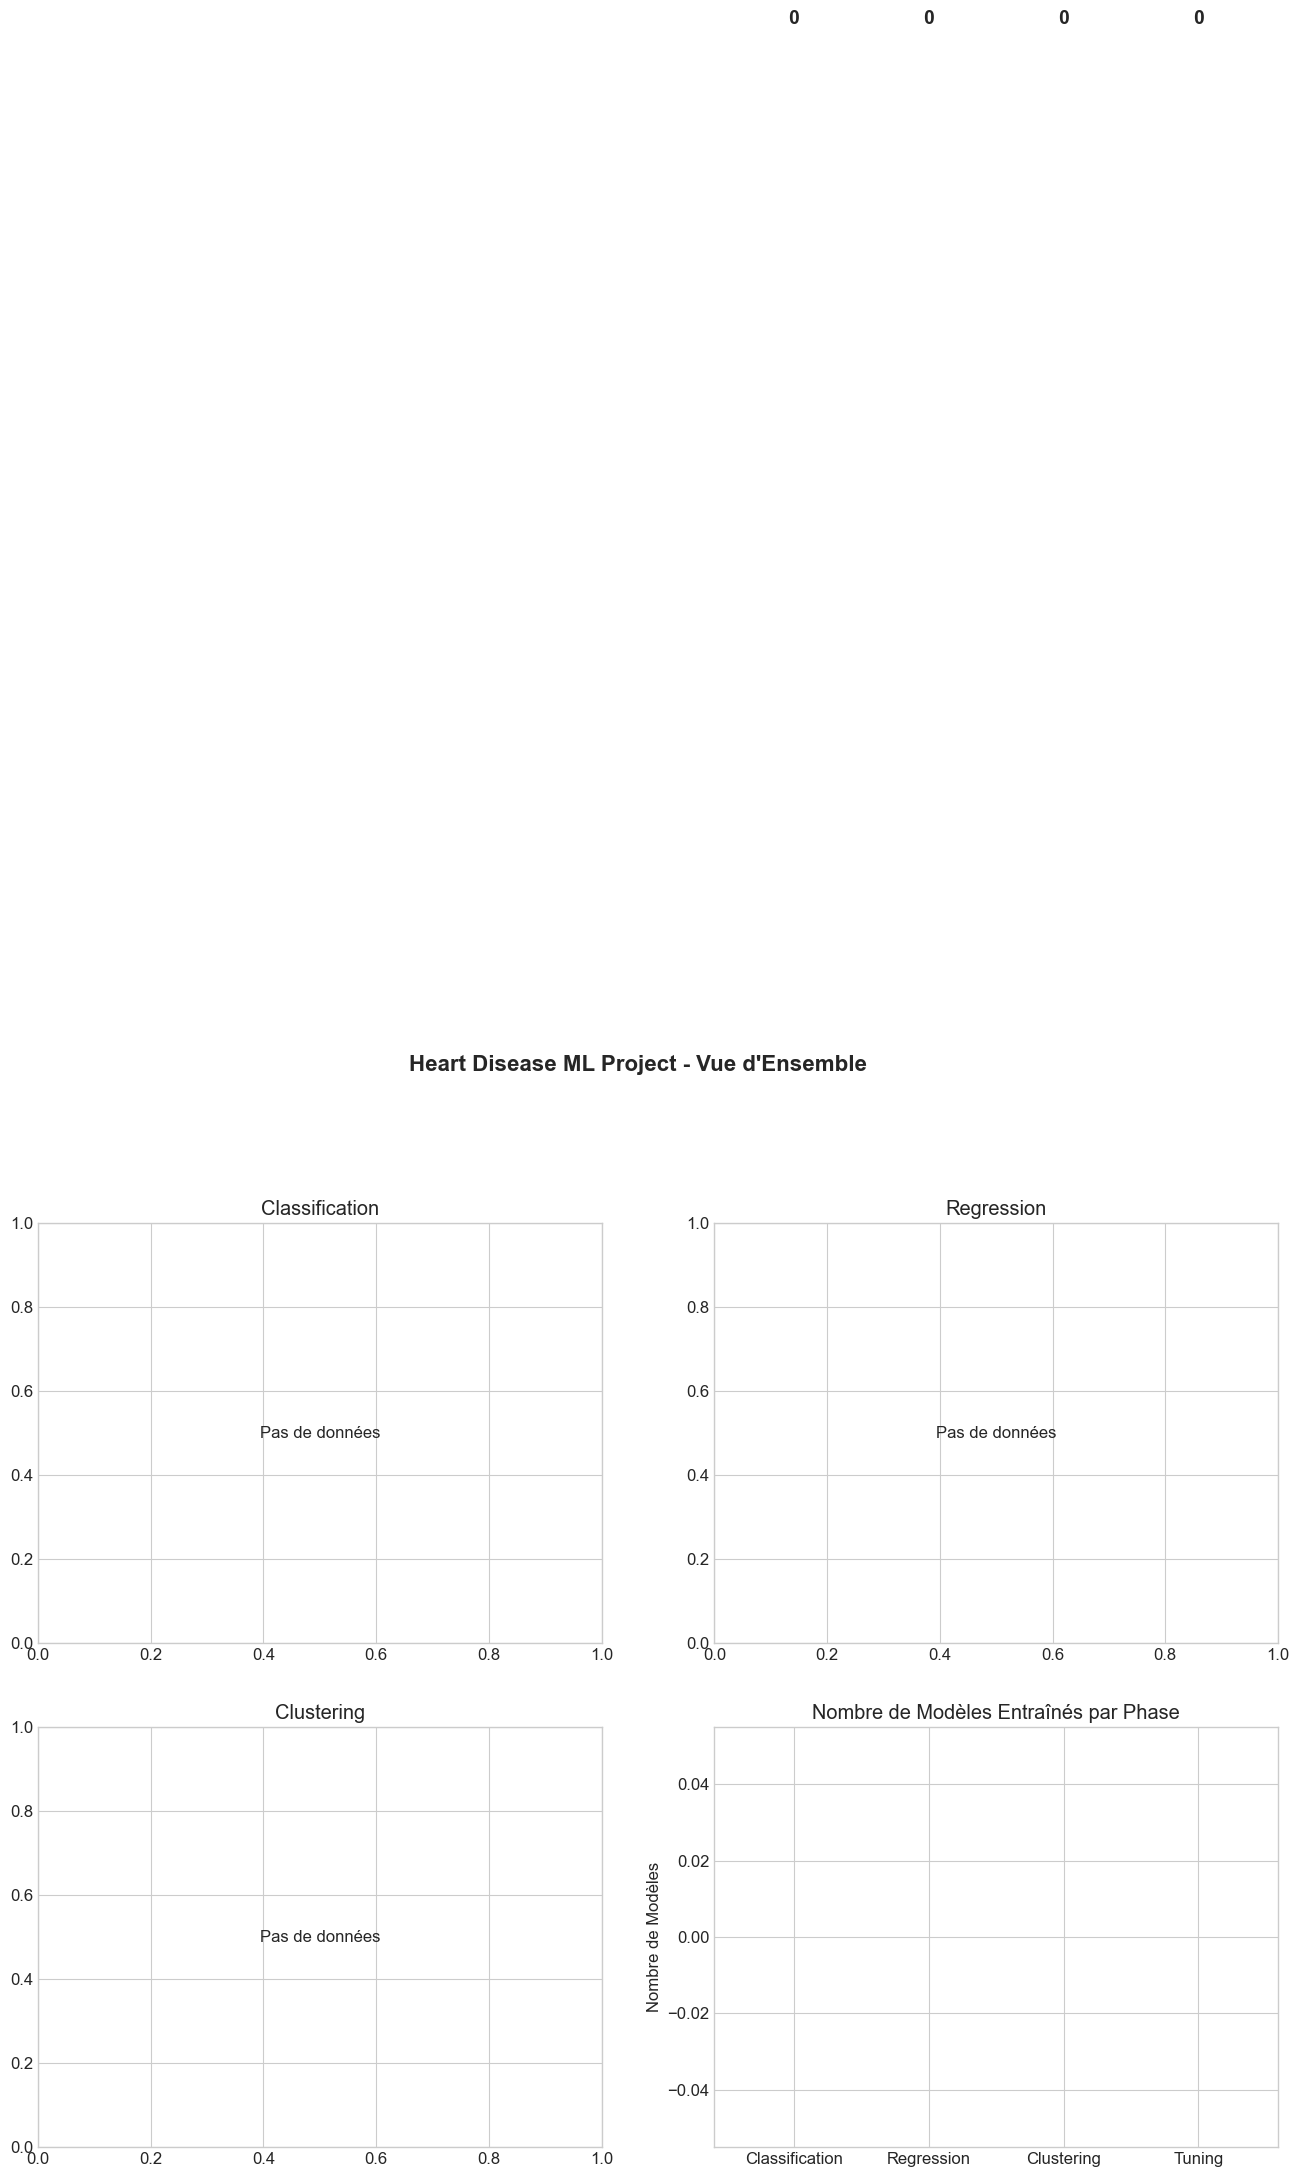


Vue d'ensemble sauvegardée: project_overview.png


In [13]:
# Créer une visualisation synthétique
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Classification - Top 5
ax1 = axes[0, 0]
if not classification_runs.empty and 'metrics.accuracy' in classification_runs.columns:
    top5 = classification_runs.nlargest(5, 'metrics.accuracy')[['tags.mlflow.runName', 'metrics.accuracy']]
    top5.columns = ['Model', 'Accuracy']
    colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(top5)))
    ax1.barh(top5['Model'], top5['Accuracy'], color=colors)
    ax1.set_xlabel('Accuracy')
    ax1.set_title('Top 5 Classification Models')
    ax1.set_xlim([0.7, 1.0])
else:
    ax1.text(0.5, 0.5, 'Pas de données', ha='center', va='center')
    ax1.set_title('Classification')

# 2. Régression - Tous les modèles
ax2 = axes[0, 1]
if not regression_runs.empty and 'metrics.r2' in regression_runs.columns:
    reg_data = regression_runs[['tags.mlflow.runName', 'metrics.r2']].dropna()
    reg_data.columns = ['Model', 'R²']
    reg_data = reg_data.sort_values('R²', ascending=True)
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(reg_data)))
    ax2.barh(reg_data['Model'], reg_data['R²'], color=colors)
    ax2.set_xlabel('R² Score')
    ax2.set_title('Regression Models - R² Score')
else:
    ax2.text(0.5, 0.5, 'Pas de données', ha='center', va='center')
    ax2.set_title('Regression')

# 3. Clustering - Silhouette
ax3 = axes[1, 0]
if not clustering_runs.empty and 'metrics.silhouette_score' in clustering_runs.columns:
    clust_data = clustering_runs[['tags.mlflow.runName', 'metrics.silhouette_score']].dropna()
    clust_data.columns = ['Model', 'Silhouette']
    clust_data = clust_data.sort_values('Silhouette', ascending=True)
    colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(clust_data)))
    ax3.barh(clust_data['Model'], clust_data['Silhouette'], color=colors)
    ax3.set_xlabel('Silhouette Score')
    ax3.set_title('Clustering Models - Silhouette Score')
else:
    ax3.text(0.5, 0.5, 'Pas de données', ha='center', va='center')
    ax3.set_title('Clustering')

# 4. Nombre de modèles par phase
ax4 = axes[1, 1]
phases = ['Classification', 'Regression', 'Clustering', 'Tuning']
counts = [
    len(classification_runs) if not classification_runs.empty else 0,
    len(regression_runs) if not regression_runs.empty else 0,
    len(clustering_runs) if not clustering_runs.empty else 0,
    len(tuning_runs) if not tuning_runs.empty else 0
]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6']
bars = ax4.bar(phases, counts, color=colors)
ax4.set_ylabel('Nombre de Modèles')
ax4.set_title('Nombre de Modèles Entraînés par Phase')
for bar, count in zip(bars, counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.suptitle('Heart Disease ML Project - Vue d\'Ensemble', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/project_overview.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nVue d'ensemble sauvegardée: project_overview.png")

## 8. Guide MLflow UI

In [14]:
print("""
╔══════════════════════════════════════════════════════════════════════╗
║                    GUIDE - MLFLOW UI                                  ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                       ║
║  Pour lancer l'interface MLflow:                                      ║
║                                                                       ║
║  1. Ouvrez un terminal dans le dossier du projet                      ║
║                                                                       ║
║  2. Exécutez la commande:                                             ║
║     > mlflow ui --port 5000                                           ║
║                                                                       ║
║  3. Ouvrez votre navigateur à l'adresse:                              ║
║     http://localhost:5000                                             ║
║                                                                       ║
║  Fonctionnalités de l'UI:                                             ║
║  - Voir toutes les expériences dans le panneau gauche                 ║
║  - Cliquer sur une expérience pour voir ses runs                      ║
║  - Comparer plusieurs runs en les sélectionnant                       ║
║  - Voir les paramètres, métriques et artefacts de chaque run          ║
║  - Télécharger les modèles enregistrés                                ║
║  - Visualiser les graphiques de métriques                             ║
║                                                                       ║
╚══════════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════════╗
║                    GUIDE - MLFLOW UI                                  ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                       ║
║  Pour lancer l'interface MLflow:                                      ║
║                                                                       ║
║  1. Ouvrez un terminal dans le dossier du projet                      ║
║                                                                       ║
║  2. Exécutez la commande:                                             ║
║     > mlflow ui --port 5000                                           ║
║                                                                       ║
║  3. Ouvrez votre navigateur à l'adresse:                              ║
║     http://localhost:5000                                             ║
║                                      

In [15]:
# Script pour lancer MLflow UI (à exécuter dans le terminal)
print("Pour démarrer MLflow UI, exécutez cette commande dans votre terminal:")
print("\n    mlflow ui --port 5000\n")
print("Puis ouvrez http://localhost:5000 dans votre navigateur.")

Pour démarrer MLflow UI, exécutez cette commande dans votre terminal:

    mlflow ui --port 5000

Puis ouvrez http://localhost:5000 dans votre navigateur.


## 9. Conclusion

In [16]:
# Statistiques finales
total_models = sum([
    len(classification_runs) if not classification_runs.empty else 0,
    len(regression_runs) if not regression_runs.empty else 0,
    len(clustering_runs) if not clustering_runs.empty else 0,
    len(tuning_runs) if not tuning_runs.empty else 0
])

print("\n" + "=" * 70)
print("RÉSUMÉ DU PROJET - Heart Disease ML")
print("=" * 70)
print(f"\nTotal de modèles entraînés et trackés: {total_models}")
print(f"\nExpériences MLflow créées:")
for phase, exp_name in EXPERIMENTS.items():
    exp = mlflow.get_experiment_by_name(exp_name)
    status = "✓" if exp else "✗"
    print(f"  {status} {exp_name}")

print("\nFichiers générés:")
print("  - mlflow_utils.py (module utilitaire)")
print("  - classification_comparison.png")
print("  - regression_comparison.png")
print("  - clustering_comparison.png")
print("  - project_overview.png")
print("  - best_models_summary.csv")

print("\n" + "=" * 70)
print("Projet complété avec succès!")
print("=" * 70)


RÉSUMÉ DU PROJET - Heart Disease ML

Total de modèles entraînés et trackés: 0

Expériences MLflow créées:
  ✗ Heart_Disease_01_EDA
  ✗ Heart_Disease_02_Feature_Engineering
  ✗ Heart_Disease_03_Clustering
  ✗ Heart_Disease_04_Classification
  ✗ Heart_Disease_05_Regression
  ✗ Heart_Disease_06_Hyperparameter_Tuning
  ✗ Heart_Disease_07_Final_Comparison

Fichiers générés:
  - mlflow_utils.py (module utilitaire)
  - classification_comparison.png
  - regression_comparison.png
  - clustering_comparison.png
  - project_overview.png
  - best_models_summary.csv

Projet complété avec succès!
